# Titanic Survival Prediction
## Problem Defination
The objective of this project is to build a machine learning model that can predict the survival of passengers aboard the RMS
Titanic based on specific feature such as age, gender, class and other personal and socioeconomic attributes. By analyzing historical passenger 
data, the model aims to classify whether a given passenger is likely to survive or not in the event of a similar disaster.

Using various machine learning techniques, the project will envolve data collection, cleaning, feature engineering, and model training, with performance 
evaluated on standard metrics. The final model will be tested using Kaggle's Titanic competition framework to assess its real-world application and
accuracy.

# Import & Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 11)

# Dataset Overview

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().sum()/len(train_df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Feature Engineering & EDA

In [7]:
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

train_df.groupby(["FamilySize"], as_index=False)["Survived"].agg(["count","mean"])

,FamilySize,count,mean
0,1,537,0.303538
1,2,161,0.552795
2,3,102,0.578431
3,4,29,0.724138
4,5,15,0.200000
5,6,22,0.136364
6,7,12,0.333333
7,8,6,0.000000
8,11,7,0.000000


C:\Users\arman\AppData\Local\Temp\ipykernel_8668\2593961206.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=family_survival, x="FamilySize", y="mean", palette="viridis")


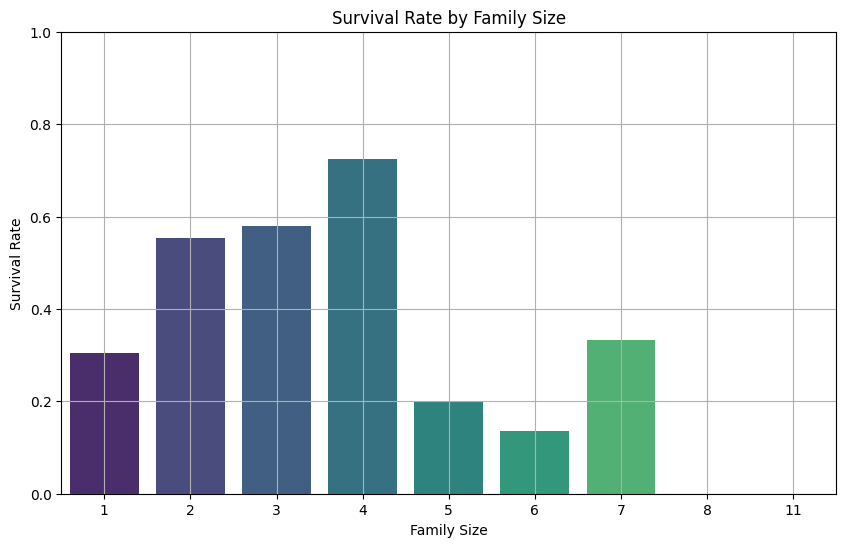

In [8]:
family_survival = train_df.groupby("FamilySize")["Survived"].agg(["count", "mean"]).reset_index()

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=family_survival, x="FamilySize", y="mean", palette="viridis")

plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)  # survival between rate 0 to 1.
plt.grid(True)
plt.show()

In [9]:
train_df["Fam_type"] = pd.cut(train_df.FamilySize, [0,1,4,7,11], labels=['Solo', 'Small', 'Medium', 'Big'])
test_df["Fam_type"] = pd.cut(test_df.FamilySize, [0,1,4,7,11], labels=['Solo', 'Small', 'Medium', 'Big'])

train_df.groupby(["Fam_type"], as_index=False)["Survived"].agg(["count","mean"])

C:\Users\arman\AppData\Local\Temp\ipykernel_8668\3812668715.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Fam_type"], as_index=False)["Survived"].agg(["count","mean"])


,Fam_type,count,mean
0,Solo,537,0.303538
1,Small,292,0.578767
2,Medium,49,0.204082
3,Big,13,0.000000


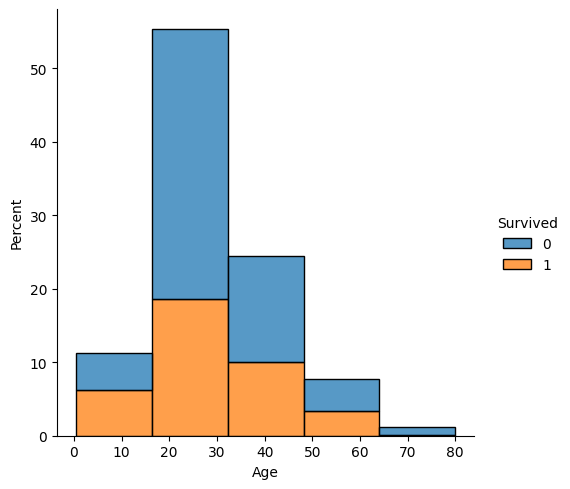

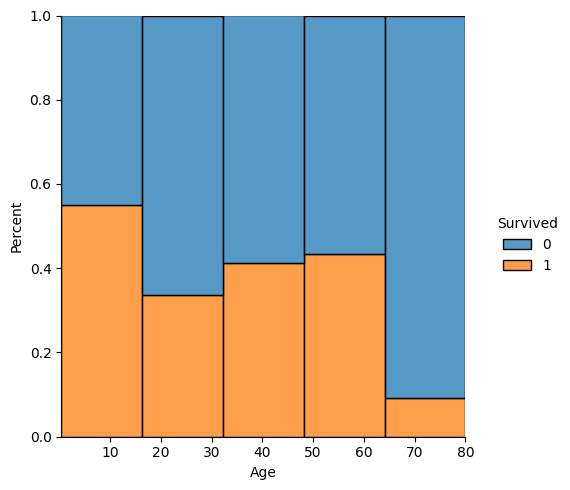

In [10]:
train_df['Age'] = train_df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))
test_df['Age'] = test_df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

sns.displot(train_df, x="Age", hue="Survived", binwidth=17, height=5, multiple='stack', stat='percent')
sns.displot(train_df, x="Age", hue="Survived", binwidth=17, height=5, multiple='fill', stat='percent')

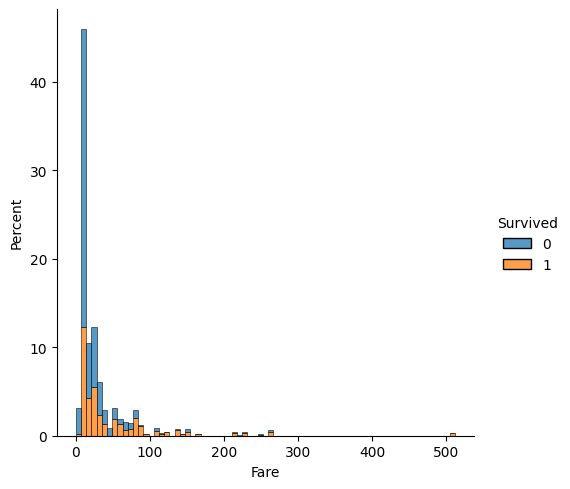

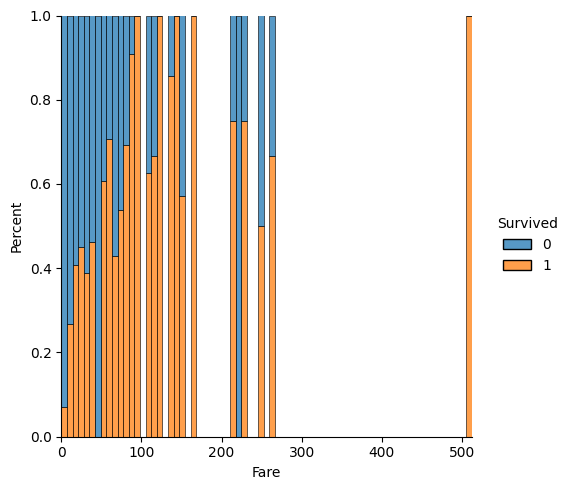

In [11]:
sns.displot(train_df, x="Fare", hue="Survived", binwidth=7, height=5, multiple='stack', stat='percent')
sns.displot(train_df, x="Fare", hue="Survived", binwidth=7, height=5, multiple='fill', stat='percent')

In [12]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

C:\Users\arman\AppData\Local\Temp\ipykernel_8668\1789954948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Survived', palette=["red","green"])


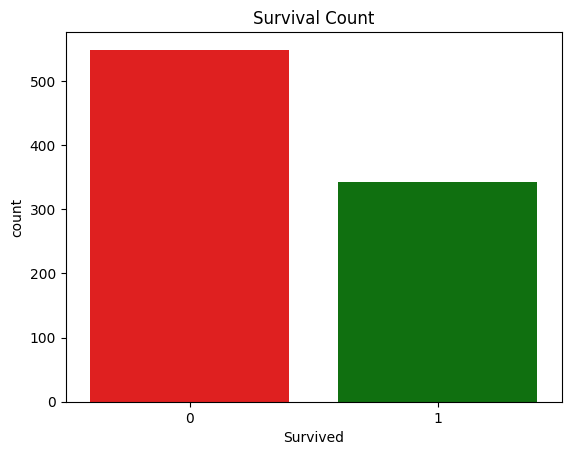

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [13]:
# Survival count plot
sns.countplot(data=train_df, x='Survived', palette=["red","green"])
plt.title("Survival Count")
plt.show()

# Percentage survival
survival_rate = train_df['Survived'].value_counts(normalize=True) * 100
print(survival_rate)


In [14]:
train_df.select_dtypes(include="object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

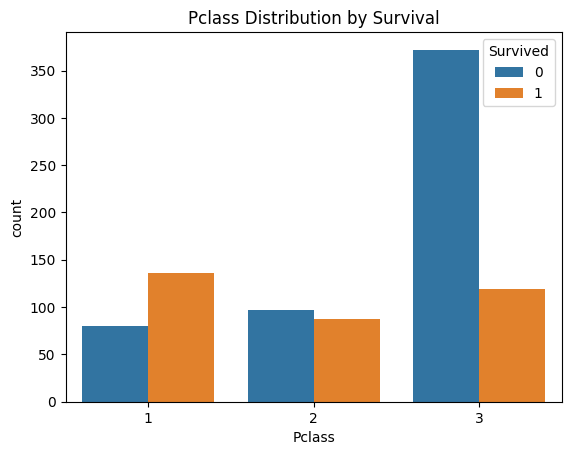

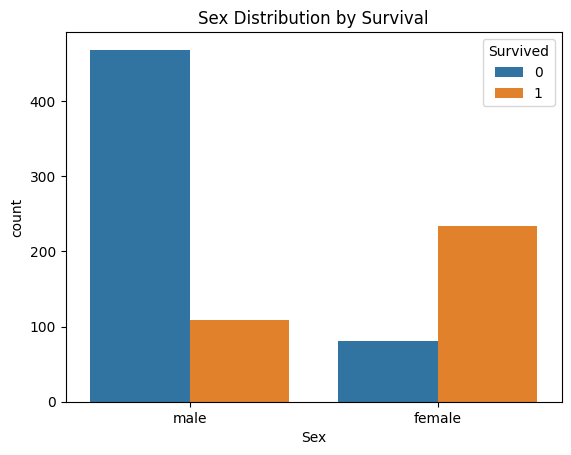

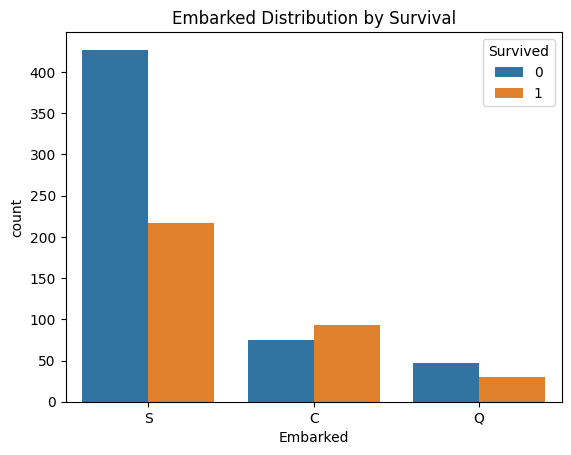

In [15]:
categorical_cols = ['Pclass', 'Sex', 'Embarked']

for col in categorical_cols:
    sns.countplot(data=train_df, x=col, hue='Survived')
    plt.title(f"{col} Distribution by Survival")
    plt.show()


In [16]:
train_df.select_dtypes(include=["float64","int64"]).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize'],
      dtype='object')

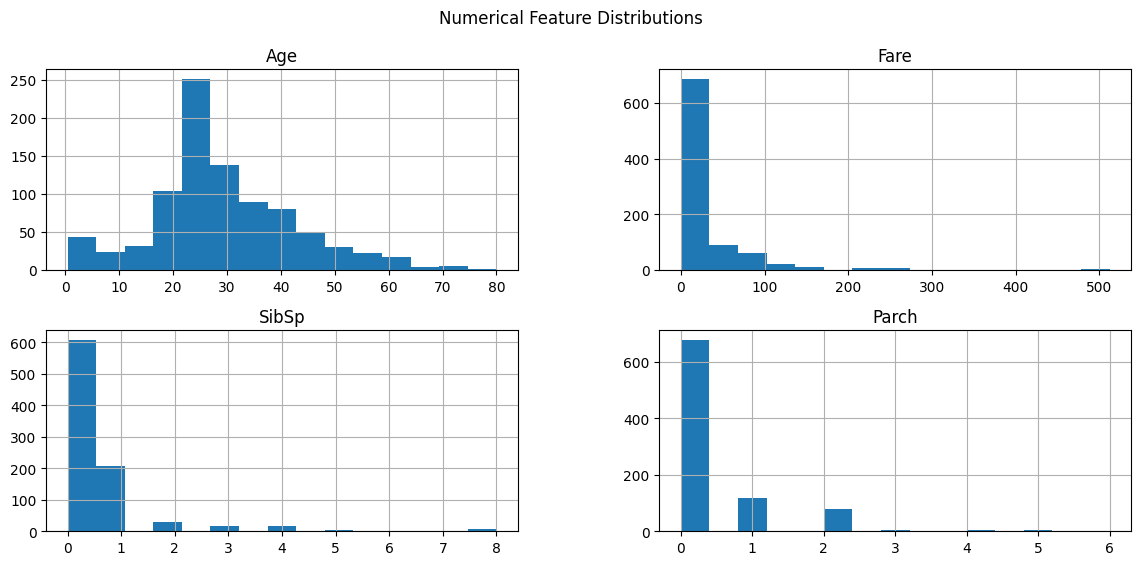

In [17]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']

train_df[numerical_cols].hist(bins=15, figsize=(14, 6), layout=(2, 2))
plt.suptitle('Numerical Feature Distributions')
plt.show()

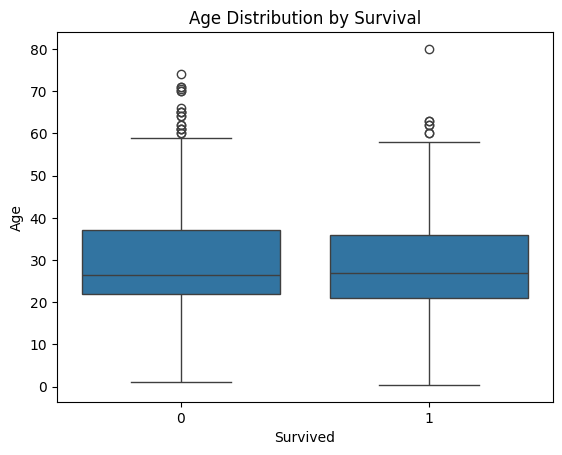

In [18]:
# Age vs Survival 
sns.boxplot(data=train_df, x='Survived', y='Age')
plt.title("Age Distribution by Survival")
plt.show()

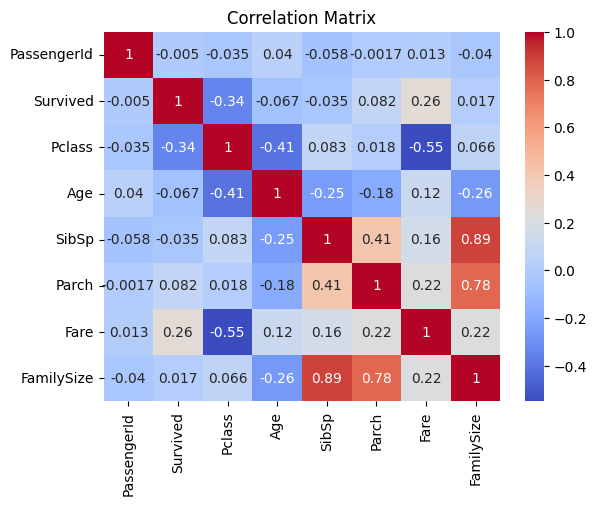

In [19]:
# Correlation Matrix

corr_matrix = train_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature Extraction 

In [20]:
train_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [21]:
train_df["Title"] = train_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())
test_df["Title"] = test_df["Name"].str.split(pat=",", expand=True)[1].str.split(pat=".", expand=True)[0].apply(lambda x: x.strip())

In [22]:
train_df.groupby(["Title"], as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Capt,1,0.000000
1,Col,2,0.500000
2,Don,1,0.000000
3,Dr,7,0.428571
4,Jonkheer,1,0.000000
5,Lady,1,1.000000
6,Major,2,0.500000
7,Master,40,0.575000
8,Miss,182,0.697802
9,Mlle,2,1.000000


In [23]:
train_df["Title"] = train_df["Title"].replace(['Capt','Col','Major','Rev','Dr'], 'Officers')
train_df["Title"] = train_df["Title"].replace(['Mrs','Mme'], 'Mrs')
train_df["Title"] = train_df["Title"].replace(['Miss','Ms','Mlle'], 'Miss')
train_df["Title"] = train_df["Title"].replace(['Master'], 'Master')
train_df["Title"] = train_df["Title"].replace(['Lady','the Countess','Sir','Jonkheer','Don'], 'VIP')
train_df["Title"] = train_df["Title"].replace(['Mr'], 'Mr')

test_df["Title"] = test_df["Title"].replace(['Capt','Col','Major','Rev','Dr'], 'Officers')
test_df["Title"] = test_df["Title"].replace(['Mrs','Mme'], 'Mrs')
test_df["Title"] = test_df["Title"].replace(['Miss','Ms','Mlle'], 'Miss')
test_df["Title"] = test_df["Title"].replace(['Master'], 'Master')
test_df["Title"] = test_df["Title"].replace(['Lady','the Countess','Sir','Jonkheer','Don'], 'VIP')
test_df["Title"] = test_df["Title"].replace(['Mr'], 'Mr')

In [24]:
train_df.groupby(['Title'], as_index=False)['Survived'].agg(['count','mean'])

,Title,count,mean
0,Master,40,0.575000
1,Miss,185,0.702703
2,Mr,517,0.156673
3,Mrs,126,0.793651
4,Officers,18,0.277778
5,VIP,5,0.600000


# Data Cleaning

In [25]:
train_df.Embarked=train_df.Embarked.fillna(train_df.Embarked.mode()[0])
test_df.Embarked=test_df.Embarked.fillna(test_df.Embarked.mode()[0])

In [26]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize',
       'Fam_type', 'Title'],
      dtype='object')

In [27]:
train_df.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize'], inplace=True, axis=1)
test_df.drop(['PassengerId','Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'FamilySize'], inplace=True, axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_type,Title
0,0,3,male,22.0,7.2500,S,Small,Mr
1,1,1,female,38.0,71.2833,C,Small,Mrs
2,1,3,female,26.0,7.9250,S,Solo,Miss
3,1,1,female,35.0,53.1000,S,Small,Mrs
4,0,3,male,35.0,8.0500,S,Solo,Mr


In [28]:
train_df.duplicated().unique()

array([False,  True])

In [29]:
train_df.shape

(891, 8)

In [30]:
test_df.duplicated().unique()

array([False,  True])

In [31]:
test_df.shape

(418, 7)

In [32]:
train_df.drop_duplicates(inplace=True)
train_df.shape

(786, 8)

In [33]:
test_df.drop_duplicates(inplace=True)
test_df.shape

(382, 7)

# Encoding 

In [34]:
from sklearn.preprocessing import LabelEncoder
train_df['Sex'] = LabelEncoder().fit_transform(train_df['Sex'])
train_df['Embarked'] = LabelEncoder().fit_transform(train_df['Embarked'])
train_df['Fam_type'] = LabelEncoder().fit_transform(train_df['Fam_type'])
train_df['Title'] = LabelEncoder().fit_transform(train_df['Title'])

test_df['Sex'] = LabelEncoder().fit_transform(test_df['Sex'])
test_df['Embarked'] = LabelEncoder().fit_transform(test_df['Embarked'])
test_df['Fam_type'] = LabelEncoder().fit_transform(test_df['Fam_type'])
test_df['Title'] = LabelEncoder().fit_transform(test_df['Title'])

In [35]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam_type,Title
0,0,3,1,22.0,7.2500,2,2,2
1,1,1,0,38.0,71.2833,0,2,3
2,1,3,0,26.0,7.9250,2,3,1
3,1,1,0,35.0,53.1000,2,2,3
4,0,3,1,35.0,8.0500,2,3,2


# Feature Selection

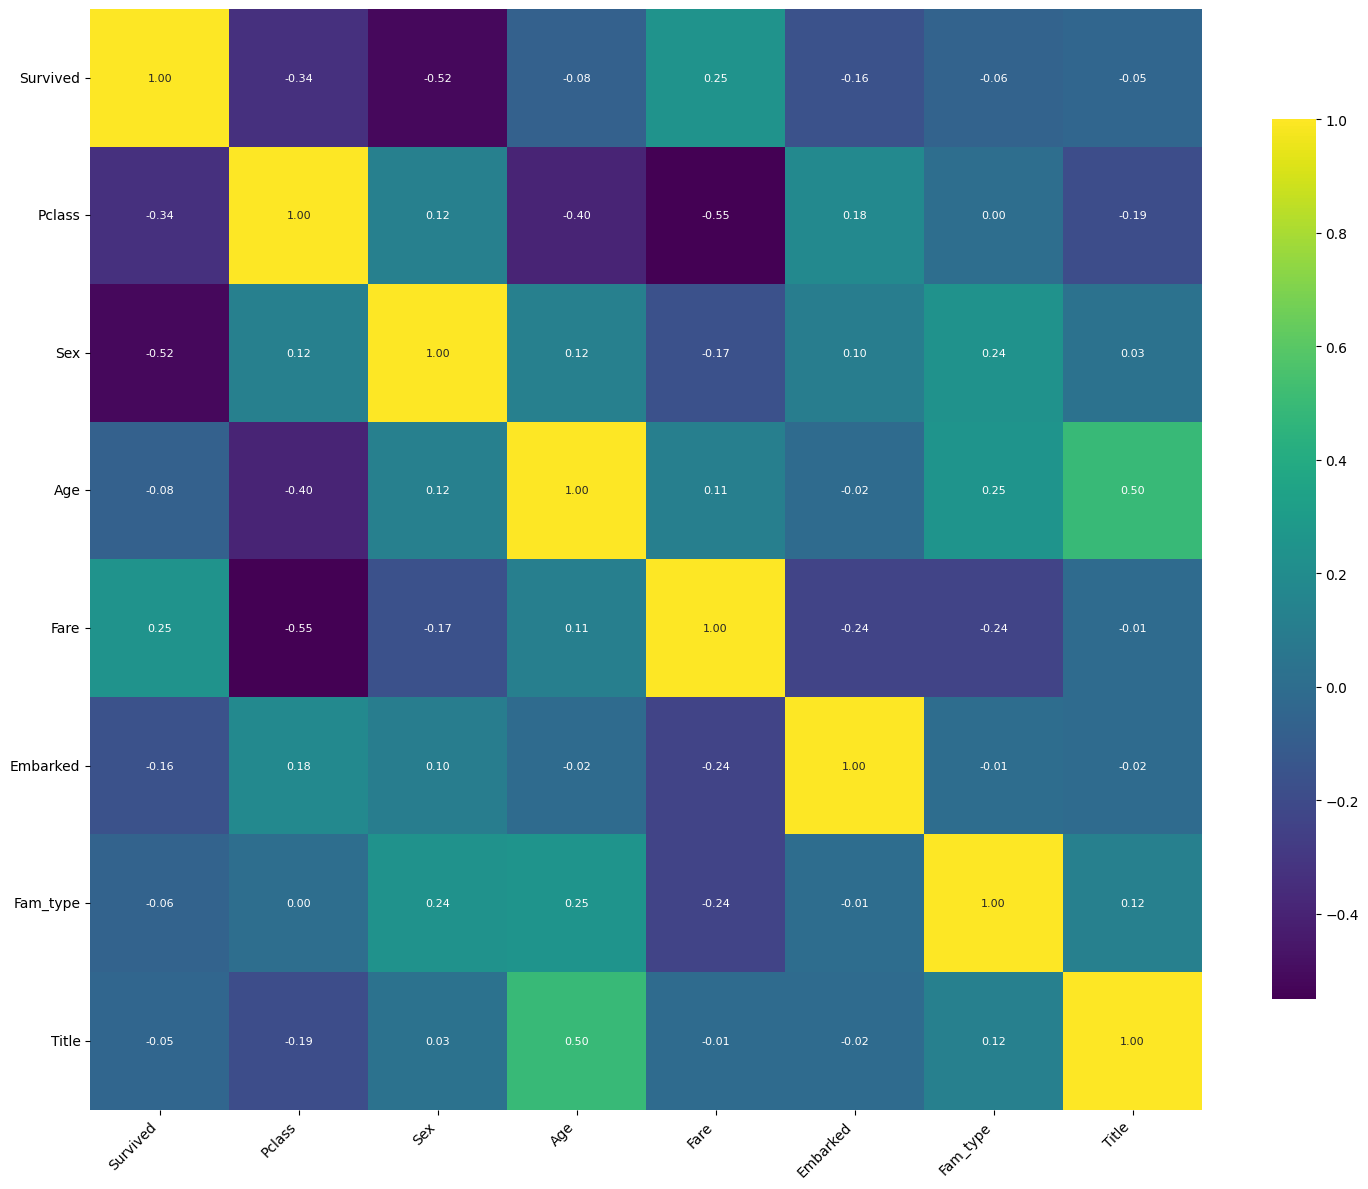

In [36]:
# Calculate the correlation matrix...
corr_matrix = train_df.corr(numeric_only=True)

# Adjust the figure size and font properties for better readability
plt.figure(figsize=(15, 12)) # Increase figure size
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', annot_kws={'size': 8}, cbar_kws={'shrink': 0.8})

# Rotate the x and y labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout() # Adjust layout for batter fit
plt.show()

In [37]:
train_df = train_df.loc[:, ["Survived","Pclass","Sex","Age","Fare","Embarked","Fam_type","Title"]]
test_df = test_df.loc[:, ["Pclass","Sex","Age","Fare","Embarked","Fam_type","Title"]]

# Standardization

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only Age and Fare
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

# Data Splitting

In [39]:
X = train_df.drop(columns="Survived")
y = train_df["Survived"]

# Class imbalance.

In [40]:
# Over-Sampling....

# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_resampled , y_resampled = ros.fit_resample(X,y)

# Under-Sampling....
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled , y_resampled = rus.fit_resample(X,y)

# Model Selection & Training

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

# Model Evaluation

In [42]:
# Machine Learning Classifier Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , BaggingClassifier , VotingClassifier
from xgboost import XGBClassifier

In [62]:
rfc = RandomForestClassifier(max_depth=9, n_estimators=100)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)*100 , rfc.score(X_train, y_train)*100

(90.0, 91.15384615384615)

In [63]:
# for i in range(1,50):
#     rfc1 = RandomForestClassifier(max_depth=i)
#     rfc1.fit(X_train, y_train)
#     print(i,rfc1.score(X_test, y_test)*100 , rfc1.score(X_train, y_train)*100)

In [64]:
y_pred = rfc.predict(X_test)

In [65]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91        70
           1       0.90      0.88      0.89        60

    accuracy                           0.90       130
   macro avg       0.90      0.90      0.90       130
weighted avg       0.90      0.90      0.90       130



# Hyperparameter Tuning

In [66]:
# # GridSearchCV........

# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [67]:
# df = {"criterion":["gini", "entropy", "log_loss"],
#     "n_estimators":[j for j in range(1,300)],
#     "max_depth":[i for i in range(1,20)],}

In [68]:
# gd = GridSearchCV(RandomForestClassifier(),param_grid=df)
# gd.fit(X_train,y_train)

In [69]:
# gd.best_params_

In [70]:
# gd.best_score_*100

In [71]:
# # RandomizedSearchCV........

# rd = RandomizedSearchCV(RandomForestClassifier(),param_distributions=df,n_iter=20)
# rd.fit(X_train,y_train)
# rd.best_params_
# rd.best_score_

# Confusion Matrix

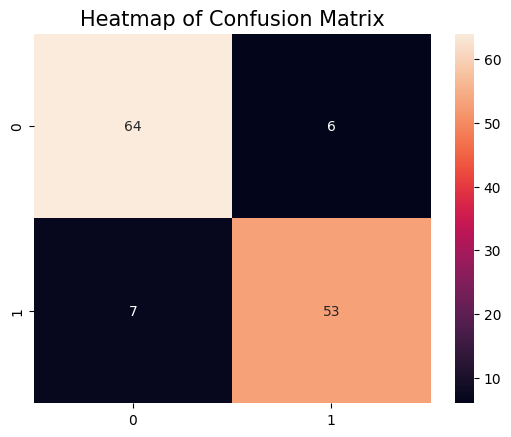

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rfc.predict(X_test))
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Model Deployment

In [74]:
import joblib
joblib.dump(rfc, "Titanic Prediction.pkl")

['Titanic Prediction.pkl']